In [1]:
!pip install geopandas
!pip install pandas
!pip install osmnx
!pip install networkx
!pip install geopy
!pip install folium
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninsta

In [3]:
import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import geopy as gpy
# from IPython.display import Image
# from geopy.geocoders import Nominatim
import regex as re
from shapely import wkt
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import seaborn as sns

%matplotlib inline
ox.__version__

'1.3.0'

## Generating a graph from OSMNX

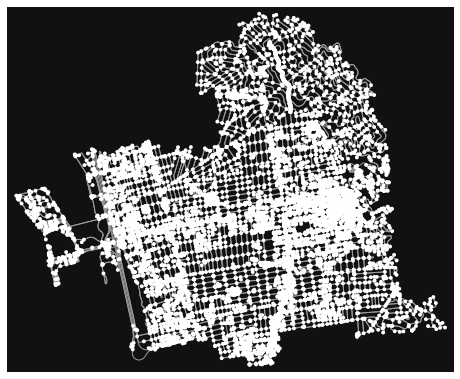

In [4]:
# download/model a street network for some city then visualize it
# https://osmnx.readthedocs.io/en/stable/osmnx.html
G = ox.graph_from_place("Berkeley, California, USA",simplify=True)
fig, ax = ox.plot_graph(G)

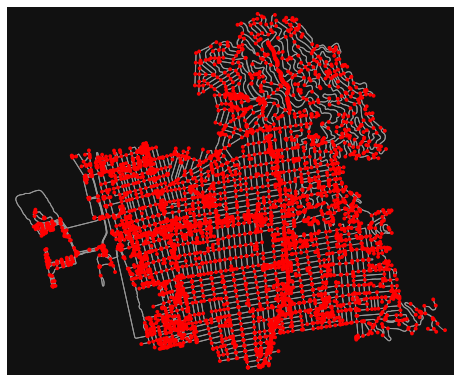

In [5]:
G = ox.graph_from_place("Berkeley, California, USA", network_type="bike",simplify=True)
fig, ax = ox.plot_graph(G, node_color="r")

## Converting it into nodes and edges

In [6]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

y           x  street_count highway  \
osmid                                                   
34351120  37.866022 -122.246099             1     NaN   
34485314  37.866140 -122.247001             3     NaN   
35719055  37.859827 -122.244383             3     NaN   
35719098  37.866058 -122.248403             3     NaN   
35719102  37.867389 -122.249579             3     NaN   

                             geometry  
osmid                                  
34351120  POINT (-122.24610 37.86602)  
34485314  POINT (-122.24700 37.86614)  
35719055  POINT (-122.24438 37.85983)  
35719098  POINT (-122.24840 37.86606)  
35719102  POINT (-122.24958 37.86739)

In [7]:

'''
u is origin, v is destination
tags come from https://wiki.openstreetmap.org/wiki/Main_Page
'''
gdf_edges.head()


osmid              name  \
u        v          key                                                    
34351120 2539109173 0                        355595002  Clark Kerr Trail   
34485314 53020998   0                        188703408        Dwight Way   
         2539109148 0                          5077756        Eloi's Way   
         2532680550 0             [5072889, 188703407]        Dwight Way   
35719055 53154694   0    [34815520, 34815521, 6405663]     Avalon Avenue   

                                         highway width  oneway reversed  \
u        v          key                                                   
34351120 2539109173 0                       path     1   False    False   
34485314 53020998   0                residential   NaN   False     True   
         2539109148 0                    service   NaN   False    False   
         2532680550 0        [residential, path]     1   False    False   
35719055 53154694   0    [residential, cycleway]   NaN   False     True   

                         length  \
u        v          key           
34351120 2539109173 0    18.074   
34485314 53020998   0    57.977   
         2539109148 0    63.503   
         2532680550 0    54.499   
35719055 53154694   0    91.868   

                                                                  geometry  \
u        v          key                                                      
34351120 2539109173 0    LINESTRING (-122.24610 37.86602, -122.24605 37...   
34485314 53020998   0    LINESTRING (-122.24700 37.86614, -122.24766 37...   
         2539109148 0    LINESTRING (-122.24700 37.86614, -122.24699 37...   
         2532680550 0    LINESTRING (-122.24700 37.86614, -122.24653 37...   
35719055 53154694   0    LINESTRING (-122.24438 37.85983, -122.24447 37...   

                        maxspeed lanes bridge service  ref access junction  \
u        v          key                                                      
34351120 2539109173 0        NaN   NaN    NaN     NaN  NaN    NaN      NaN   
34485314 53020998   0     25 mph   NaN    NaN     NaN  NaN    NaN      NaN   
         2539109148 0        NaN   NaN    NaN     NaN  NaN    NaN      NaN   
         2532680550 0     25 mph   NaN    NaN     NaN  NaN    NaN      NaN   
35719055 53154694   0     25 mph     2    NaN     NaN  NaN    NaN      NaN   

                        tunnel  
u        v          key         
34351120 2539109173 0      NaN  
34485314 53020998   0      NaN  
         2539109148 0      NaN  
         2532680550 0      NaN  
35719055 53154694   0      NaN

## We can get specific!

OSM “way” tags to add as graph edge attributes, when present in the data retrieved from OSM. Default is [“bridge”, “tunnel”, “oneway”, “lanes”, “ref”, “name”, “highway”, “maxspeed”, “service”, “access”, “area”, “landuse”, “width”, “est_width”, “junction”].

https://osmnx.readthedocs.io/en/stable/osmnx.html

/usr/local/lib/python3.9/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


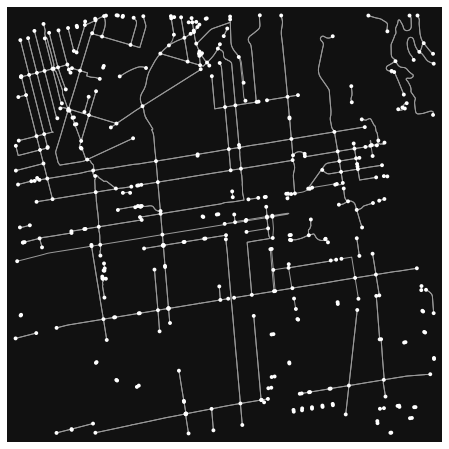

In [8]:

useful_tags = ox.settings.useful_tags_way + ['cycleway']
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)

# Cooridnates are Berkeley
coords = (37.8715, -122.2730)

# Use graph from point (usually you want to choose the center of a region, distance is in meters)
G = ox.graph_from_point(coords, dist=2000, network_type='bike', simplify=False)

# complicated way of saying, give me bicycle cycleways only
non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if not ('cycleway' in d or d['highway']=='cycleway')]

# remove those edges
G.remove_edges_from(non_cycleways)

# removes the nodes that are isolated as a result of the removed edges
G = ox.utils_graph.remove_isolated_nodes(G)

# clean up graph (double check)
G = ox.simplify_graph(G)

# get nodes and edges
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
fig, ax = ox.plot_graph(G)

In [9]:
gdf_nodes.head()

y           x  street_count highway  ref  \
osmid                                                        
52987672  37.874606 -122.260054             4     NaN  NaN   
52991832  37.871256 -122.258057             3     NaN  NaN   
52996335  37.873213 -122.260582             2     NaN  NaN   
53006299  37.870162 -122.265774             4     NaN  NaN   
53006318  37.870246 -122.262066             3     NaN  NaN   

                             geometry  
osmid                                  
52987672  POINT (-122.26005 37.87461)  
52991832  POINT (-122.25806 37.87126)  
52996335  POINT (-122.26058 37.87321)  
53006299  POINT (-122.26577 37.87016)  
53006318  POINT (-122.26207 37.87025)

In [10]:
gdf_edges.head()

osmid  oneway lanes       highway  \
u        v          key                                                       
52987672 234653417  0                 184900406   False     1       service   
52991832 53048389   0                   6336139   False   NaN  unclassified   
52996335 234653417  0    [234529352, 234529361]   False   NaN  unclassified   
53006299 249237243  0     [669491496, 22016970]   False   NaN       service   
53006318 3206193516 0                 669491492   False   NaN       service   

                        service     cycleway reversed   length  \
u        v          key                                          
52987672 234653417  0     alley  shared_lane    False  136.797   
52991832 53048389   0       NaN  shared_lane     True  175.524   
52996335 234653417  0       NaN  shared_lane    False   94.684   
53006299 249237243  0       NaN  shared_lane    False  176.733   
53006318 3206193516 0       NaN  shared_lane    False    5.417   

                                                                  geometry  \
u        v          key                                                      
52987672 234653417  0    LINESTRING (-122.26005 37.87461, -122.26005 37...   
52991832 53048389   0    LINESTRING (-122.25806 37.87126, -122.25808 37...   
52996335 234653417  0    LINESTRING (-122.26058 37.87321, -122.26050 37...   
53006299 249237243  0    LINESTRING (-122.26577 37.87016, -122.26569 37...   
53006318 3206193516 0    LINESTRING (-122.26207 37.87025, -122.26203 37...   

                                           name maxspeed bridge width access  \
u        v          key                                                        
52987672 234653417  0                       NaN      NaN    NaN   NaN    NaN   
52991832 53048389   0           South Hall Road      NaN    NaN   NaN    NaN   
52996335 234653417  0          University Drive      NaN    NaN   NaN    NaN   
53006299 249237243  0    Frank Schlessinger Way      NaN    NaN   NaN    NaN   
53006318 3206193516 0    Frank Schlessinger Way      NaN    NaN   NaN    NaN   

                        junction  
u        v          key           
52987672 234653417  0        NaN  
52991832 53048389   0        NaN  
52996335 234653417  0        NaN  
53006299 249237243  0        NaN  
53006318 3206193516 0        NaN

## Basic network stats

https://osmnx.readthedocs.io/en/stable/osmnx.html

In [11]:
# what sized area does our network cover in square meters?
stats = ox.utils_graph.graph_from_gdfs(gdf_nodes, gdf_edges)
stats = ox.basic_stats(stats)
df = pd.DataFrame(pd.Series(stats, name="value")).round(3)
df

value
n                                                                           448
m                                                                           724
k_avg                                                                  3.232143
edge_length_total                                                    138326.962
edge_length_avg                                                       191.05934
streets_per_node_avg                                                   3.129464
streets_per_node_counts       {0: 0, 1: 12, 2: 82, 3: 211, 4: 124, 5: 17, 6: 2}
streets_per_node_proportions  {0: 0.0, 1: 0.026785714285714284, 2: 0.1830357...
intersection_count                                                          436
street_length_total                                                    73157.66
street_segment_count                                                        398
street_length_avg                                                    183.813216
circuity_avg                                                           1.056962
self_loop_proportion                                                   0.002513

## Betweeness and Centrality

In [12]:
## Betweeness

# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(53148825, 0.07813424825192364)

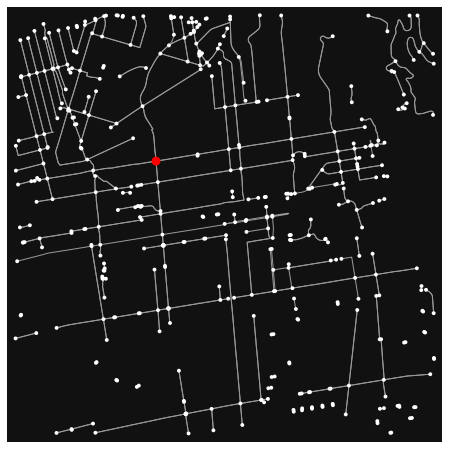

In [13]:
## Centrality

nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [14]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

# Moving on to POI

## Download list of building and amenity types from Open Street Map (OSM)

In [15]:
tab_buildings = pd.read_html('https://wiki.openstreetmap.org/wiki/Key:building', match='Value')
tab_amenities = pd.read_html('https://wiki.openstreetmap.org/wiki/Key:amenity', match='Value')

In [16]:
tab_amenities[0]

Key            Value    Element  \
    Sustenance       Sustenance Sustenance   
0      amenity              bar        NaN   
1      amenity       biergarten        NaN   
2      amenity             cafe        NaN   
3      amenity        fast_food        NaN   
4      amenity       food_court        NaN   
..         ...              ...        ...   
131    amenity      public_bath        NaN   
132    amenity  public_building        NaN   
133    amenity     refugee_site        NaN   
134    amenity  vending_machine        NaN   
135    amenity     user defined        NaN   

                                               Comment Carto rendering  \
                                            Sustenance      Sustenance   
0    Bar is a purpose-built commercial establishmen...             NaN   
1    Biergarten or beer garden is an open-air area ...             NaN   
2    Cafe is generally an informal place that offer...             NaN   
3    Fast food restaurant (see also amenity=restaur...             NaN   
4    An area with several different restaurant food...             NaN   
..                                                 ...             ...   
131  A location where the public may bathe in commo...             NaN   
132  A generic public building. Don't use! See offi...             NaN   
133  A human settlement sheltering refugees or inte...             NaN   
134  A machine selling goods – food, tickets, newsp...             NaN   
135      All commonly used values according to Taginfo             NaN   

         Photo Unnamed: 6_level_0  
    Sustenance         Sustenance  
0          NaN                NaN  
1          NaN                NaN  
2          NaN                NaN  
3          NaN                NaN  
4          NaN                NaN  
..         ...                ...  
131        NaN                NaN  
132        NaN                NaN  
133        NaN                NaN  
134        NaN                NaN  
135        NaN                NaN  

[136 rows x 7 columns]

In [17]:
building_types = tab_buildings[0]
amenity_types = tab_amenities[0]

# Format building types and amenity types to have only one column label per column
building_types.columns = building_types.columns.droplevel(1)
amenity_types.columns = amenity_types.columns.droplevel(1)

## Remove undesired amenity types

In [18]:
bad_amenities = ['driving_school', 'car_rental', 'car_wash', \
    'vehicle_inspection', 'fuel', 'grit_bin', \
    'motorcycle_parking', 'parking', 'parking_entrance', \
    'parking_space', 'taxi']

In [19]:
amenity_types = amenity_types[(amenity_types['Key'] == 'amenity') & (~amenity_types['Value'].isin(bad_amenities))]
desired_amenities = list(amenity_types['Value'])

In [20]:
desired_amenities

['bar',
 'biergarten',
 'cafe',
 'fast_food',
 'food_court',
 'ice_cream',
 'pub',
 'restaurant',
 'college',
 'kindergarten',
 'language_school',
 'library',
 'toy_library',
 'research_institute',
 'training',
 'music_school',
 'school',
 'traffic_park',
 'university',
 'bicycle_parking',
 'bicycle_repair_station',
 'bicycle_rental',
 'boat_rental',
 'boat_sharing',
 'bus_station',
 'car_sharing',
 'compressed_air',
 'charging_station',
 'driver_training',
 'ferry_terminal',
 'atm',
 'bank',
 'bureau_de_change',
 'baby_hatch',
 'clinic',
 'dentist',
 'doctors',
 'hospital',
 'nursing_home',
 'pharmacy',
 'social_facility',
 'veterinary',
 'arts_centre',
 'brothel',
 'casino',
 'cinema',
 'community_centre',
 'conference_centre',
 'events_venue',
 'exhibition_centre',
 'fountain',
 'gambling',
 'love_hotel',
 'music_venue',
 'nightclub',
 'planetarium',
 'public_bookcase',
 'social_centre',
 'stripclub',
 'studio',
 'swingerclub',
 'theatre',
 'courthouse',
 'fire_station',
 'police',


## Select building types that could be cycling destinations

In [21]:
desired_slices = [np.arange(18,25), np.arange(26, 37), np.arange(38, 53), np.arange(69, 72)]
desired_inds = np.concatenate(desired_slices)
desired_types = list(building_types.loc[desired_inds]['Value'])
desired_types

['commercial',
 'industrial',
 'kiosk',
 'office',
 'retail',
 'supermarket',
 'warehouse',
 'cathedral',
 'chapel',
 'church',
 'kingdom_hall',
 'monastery',
 'mosque',
 'presbytery',
 'religious',
 'shrine',
 'synagogue',
 'temple',
 'bakehouse',
 'bridge',
 'civic',
 'college',
 'fire_station',
 'government',
 'gatehouse',
 'hospital',
 'kindergarten',
 'public',
 'school',
 'toilets',
 'train_station',
 'transportation',
 'university',
 'hangar',
 'hut',
 'shed']

## Plot results

In [22]:
center_point = (37.874473146528274, -122.25821473949732) # UC Berkeley campus
tags = {'building': desired_types, 'amenity': desired_amenities}
G = ox.geometries_from_point(center_point, tags, dist=2000)
G

amenity  \
element_type osmid                         
node         34496815     drinking_water   
             247365891              bank   
             260556516          fountain   
             270623117          post_box   
             270623118          post_box   
...                                  ...   
relation     11779295   place_of_worship   
             12563891   community_centre   
             14404772             school   
             14526854                NaN   
             14886206             school   

                                                                 geometry  \
element_type osmid                                                          
node         34496815                         POINT (-122.24535 37.86500)   
             247365891                        POINT (-122.25295 37.85729)   
             260556516                        POINT (-122.25796 37.87245)   
             270623117                        POINT (-122.26692 37.88837)   
             270623118                        POINT (-122.27242 37.88992)   
...                                                                   ...   
relation     11779295   POLYGON ((-122.25307 37.86128, -122.25277 37.8...   
             12563891   POLYGON ((-122.26844 37.88134, -122.26880 37.8...   
             14404772   MULTIPOLYGON (((-122.27257 37.86871, -122.2707...   
             14526854   POLYGON ((-122.25487 37.87124, -122.25486 37.8...   
             14886206   MULTIPOLYGON (((-122.27373 37.86633, -122.2736...   

                       addr:city addr:housenumber     addr:street  atm  \
element_type osmid                                                       
node         34496815        NaN              NaN             NaN  NaN   
             247365891  Berkeley             2959  College Avenue  yes   
             260556516       NaN              NaN             NaN  NaN   
             270623117       NaN              NaN             NaN  NaN   
             270623118       NaN              NaN             NaN  NaN   
...                          ...              ...             ...  ...   
relation     11779295        NaN              NaN             NaN  NaN   
             12563891   Berkeley             1414   Walnut Street  NaN   
             14404772   Berkeley              NaN             NaN  NaN   
             14526854        NaN              NaN             NaN  NaN   
             14886206   Berkeley              NaN             NaN  NaN   

                              brand brand:wikidata brand:wikipedia  \
element_type osmid                                                   
node         34496815           NaN            NaN             NaN   
             247365891  Wells Fargo        Q744149  en:Wells Fargo   
             260556516          NaN            NaN             NaN   
             270623117          NaN            NaN             NaN   
             270623118          NaN            NaN             NaN   
...                             ...            ...             ...   
relation     11779295           NaN            NaN             NaN   
             12563891           NaN            NaN             NaN   
             14404772           NaN            NaN             NaN   
             14526854           NaN            NaN             NaN   
             14886206           NaN            NaN             NaN   

                       check_date:opening_hours  ... note:name  \
element_type osmid                               ...             
node         34496815                       NaN  ...       NaN   
             247365891               2022-04-25  ...       NaN   
             260556516                      NaN  ...       NaN   
             270623117                      NaN  ...       NaN   
             270623118                      NaN  ...       NaN   
...                                         ...  ...       ...   
relation     11779295                       NaN  ...    

In [23]:
G.plot()

<Axes: >

<ipython-input-24-ddae82e4203d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  G.centroid.plot(figsize=(10,10))


<Axes: >

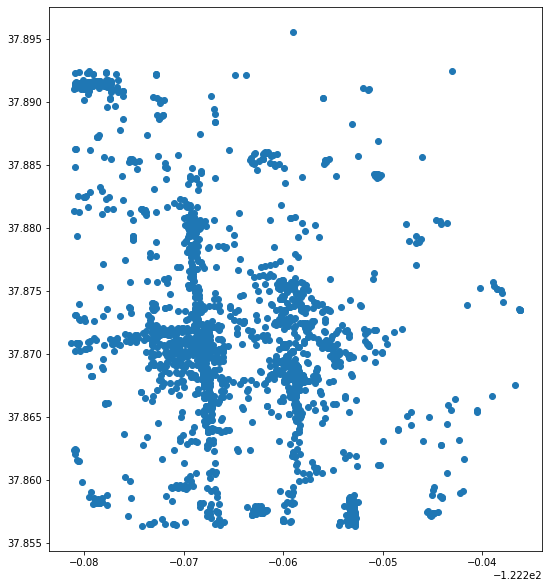

In [24]:
G.centroid.plot(figsize=(10,10))

Sample output of G.centroid.explore()

explore.png